EJERCICIO 3

Utilizando las funciones provistas por Scikit-learn, implememente los métodos de ensambles de clasificadores Bagging y AdaBoost. Compare el desempeño de estos modelos empleando 5 particiones con el conjunto de datos Wine.

*Bagging (Bootstrap Aggregating): Entrenar muchos clasificadores independientes en distintas muestras del dataset sacadas con reemplazo, y se promedian (regresión) o se toma el voto mayoritario (clasificación)

* AdaBoost (Adaptative Boosting): Entrenar varios clasificadores secuencialmente, y cada clasificador se enfoca en los errores que cometieron los anteriores. Los datos mal clasificados ponderan más para que el modelo siguiente les de mayor importancia. Se decide por voto ponderado (los clasificadores con mejor desempeño pesan más que los que tuvieron un mal desempeño)


Bagging - Mean Accuracy: 0.9719, Variance: 0.000635, Std: 0.025206
+------+----------+
| Fold | Accuracy |
+------+----------+
|  1   |  0.9722  |
|  2   |  1.0000  |
|  3   |  0.9444  |
|  4   |  0.9429  |
|  5   |  1.0000  |
+------+----------+


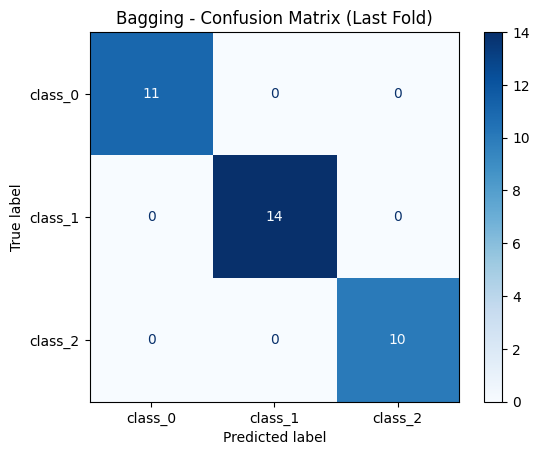

AdaBoost - Mean Accuracy: 0.8765, Variance: 0.003264, Std: 0.057129
+------+----------+
| Fold | Accuracy |
+------+----------+
|  1   |  0.9444  |
|  2   |  0.7778  |
|  3   |  0.8889  |
|  4   |  0.8571  |
|  5   |  0.9143  |
+------+----------+


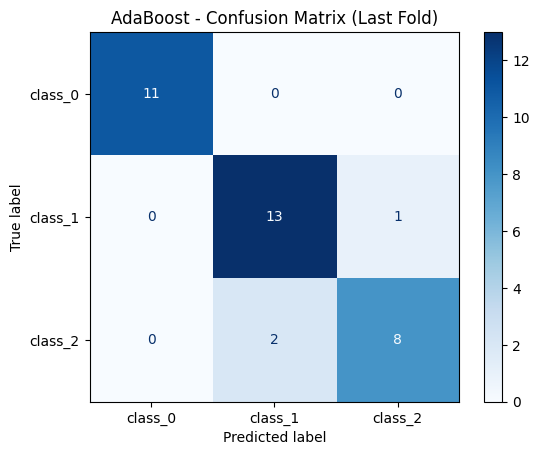

In [13]:
import numpy as np
from sklearn.datasets import load_wine
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
from prettytable import PrettyTable

# ========================
# 1) Cargar dataset
# ========================

wine = load_wine()
x=wine.data
y=wine.target

# ========================
# 2) Definir clasificadores
# ========================
base_clf = DecisionTreeClassifier(random_state=42)

baggin = BaggingClassifier(estimator=base_clf, n_estimators=50, random_state=42)
adaboost = AdaBoostClassifier(estimator=base_clf, n_estimators=50, random_state=42)

# ========================
# 3) Función para evaluar KFold
# ========================
def evaluar_kfold(model, x, y, k):
    kf = KFold(n_splits=k, shuffle=True, random_state=42)
    accuracies = []
    cms = []

    for fold_idx, (trn_idx, tst_idx) in enumerate(kf.split(x)):
        x_trn, x_tst = x[trn_idx], x[tst_idx]
        y_trn, y_tst = y[trn_idx], y[tst_idx]
        model.fit(x_trn, y_trn)
        y_pred = model.predict(x_tst)
        acc = accuracy_score(y_tst, y_pred)
        accuracies.append(acc)
        cm = confusion_matrix(y_tst, y_pred)
        cms.append(cm)
    
    mean_acc = np.mean(accuracies) # Media de accuracys
    var_acc = np.var(accuracies) # Varianza de accuracys
    std_acc = np.std(accuracies) # Desviación estándar de accuracys
    return accuracies, mean_acc, var_acc, std_acc, cms   

# ========================
# 4) Evaluar Bagging
# ========================

accs_bag, mean_bag, var_bag, std_bag, cms_bag = evaluar_kfold(baggin, x, y, 5)
print(f"Bagging - Mean Accuracy: {mean_bag:.4f}, Variance: {var_bag:.6f}, Std: {std_bag:.6f}")


#tabla de resultados
table_bag = PrettyTable()
table_bag.field_names = ["Fold", "Accuracy"]
for i, acc in enumerate(accs_bag):
    table_bag.add_row([i+1, f"{acc:.4f}"])
print(table_bag)

#matriz de confusión del último fold
cm_bag = cms_bag[-1]
disp = ConfusionMatrixDisplay(confusion_matrix=cm_bag, display_labels=wine.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("Bagging - Confusion Matrix (Last Fold)")
plt.show()


# ========================
# 5) Evaluar AdaBoost
# ========================

accs_ada, mean_ada, var_ada, std_ada, cms_ada = evaluar_kfold(adaboost, x, y, 5)
print(f"AdaBoost - Mean Accuracy: {mean_ada:.4f}, Variance: {var_ada:.6f}, Std: {std_ada:.6f}")


#tabla de resultados
table_ada = PrettyTable()
table_ada.field_names = ["Fold", "Accuracy"]   
for i, acc in enumerate(accs_ada):
    table_ada.add_row([i+1, f"{acc:.4f}"])
print(table_ada)

#matriz de confusión del último fold

cm_ada = cms_ada[-1]
disp = ConfusionMatrixDisplay(confusion_matrix=cm_ada, display_labels=wine.target_names)
disp.plot(cmap=plt.cm.Blues)
plt.title("AdaBoost - Confusion Matrix (Last Fold)")
plt.show()



CONCLUSIONES: 

Bagging tiene mayor media de exactitud que Adaboost (0.97 vs 0.87 respectivamente). Las varianzas en ambos casos son menores al 0.1% (los modelos son estables) y las desviaciones estandar son menores al 5% en adaboost y 2% en bagging, por lo que los datos están bastante centrados sobre la media. 

Observando las tablas de kfold, en bagging se llega a una exactitud del 100% (accuracy=1), mientras que en adaboost no (esto se ve también en la matriz su matriz de confusión para y_pred=1/yd=2 e y_pred=2/yd=1)


